#  Plotly, Folium and GeoPandas to make maps

In this notebook we will use the two main python modules for putting data on maps: Plotly and GeoPandas

I've found a nice article discussing the two:

### GeoPandas
GeoPandas is used for storing geo-data in a dataframe. 

GeoPandas uses numpy, pandas, shapely, flona, six, pyproj. 
Sometimes it uses Descartes as well

Find an instruction at https://www.youtube.com/watch?v=310Es1ERf1M to install it in Jupyter Notebooks.

GeoPandas can be found here: https://geopandas.readthedocs.io/

Kaggle has a very nice introduction to GeoSpatial analysis: https://www.kaggle.com/learn/geospatial-analysis

We will also use contextly for a GeoPandas basemap

### Folium
Folium is a new python module that is used to create (interactive) maps. It uses JSLeaflet to display maps as html website. 


### Plotly
Plotly is a plotting library for Python. It is used to plot data and geodata. 

If you want to present your data in a website using interactive charts and maps, Plotly is your tool. 
Plotly is a service and needs an account. You are sending a request to the plotly server and you get a html=page back. 
 
For simple usage, there is also an offline mode which you can use in Jupyter notebook. We will do this in this notebook.

Plotly documentation can be found here:


### Converting values
Some scripts on converting values, for example converting semicircles to degrees


## GeoPandas: introduction

source: https://www.youtube.com/watch?v=slqZVgB8tIg

Use shapefiles as base map, 

shapefiles can be found at https://www.diva-gis.org

In [1]:
!pip install descartes

<IPython.core.display.Javascript object>


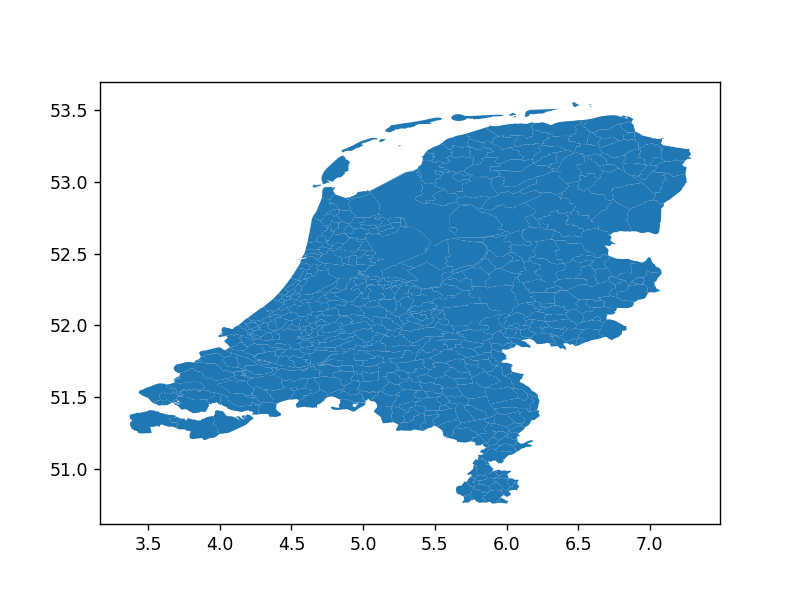

In [4]:
%matplotlib notebook
import geopandas as gpd
import descartes
import matplotlib.pyplot as plt

cities = gpd.read_file('Basemaps/NLD_adm2.shp')
cities.plot()

## Convert Pandas DataFrame to GeoPandas GeoDataFrame


In [5]:
# source: https://www.youtube.com/watch?v=aVkdWSqKG_c

### Structure of a GeoDataFrame ###
#index | col1 | col2 | col...    | geoemetry column
#                                | POING(x,y)
#Import the modules
import pandas as pd
import geopandas as gpd
#read the csv into a Pandas dataframe
airports=pd.read_csv('Basemaps/world_airports.csv')
airports.head()

,Country,Lon,Lat
0,ACORES,-14.394,-7.969
1,ACORES,-9.030,38.883
2,ACORES,-25.171,36.971
3,ACORES,-6.712,41.868
4,ACORES,-7.932,38.079


In [6]:
airports_gpf = gpd.GeoDataFrame(airports, geometry= gpd.points_from_xy(airports['Lon'], airports['Lat']))
airports_gpf
# a new column geometry with points will appear

,Country,Lon,Lat,geometry
0,ACORES,-14.394,-7.969,POINT (-14.39400 -7.96900)
1,ACORES,-9.030,38.883,POINT (-9.03000 38.88300)
2,ACORES,-25.171,36.971,POINT (-25.17100 36.97100)
3,ACORES,-6.712,41.868,POINT (-6.71200 41.86800)
4,ACORES,-7.932,38.079,POINT (-7.93200 38.07900)
...,...,...,...,...
4183,ZIMBABWE,30.859,-20.055,POINT (30.85900 -20.05500)
4184,ZIMBABWE,30.088,-20.289,POINT (30.08800 -20.28900)
4185,ZIMBABWE,29.862,-19.437,POINT (29.86200 -19.43700)
4186,ZIMBABWE,27.021,-18.630,POINT (27.02100 -18.63000)


In [7]:
# show the datatype of the new variable
type(airports_gpf)

geopandas.geodataframe.GeoDataFrame

In [11]:
airports_gpf.crs

In [6]:
# Plot the new variable
airports_gpf.plot(figsize=(10,5))

<IPython.core.display.Javascript object>

TypeError: cannot perform mean with type geometry

## Using a geopandas base map
Source: https://geopandas.readthedocs.io/en/latest/gallery/plotting_basemap_background.html
        

In [7]:
import geopandas as gpd
import pandas as pd
df = gpd.read_file(gpd.datasets.get_path('nybb'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

<IPython.core.display.Javascript object>

In [8]:
df = df.to_crs(epsg=3857)

In [9]:
import contextily as ctx

In [10]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

<IPython.core.display.Javascript object>

## Folium


In [11]:
!pip install folium


In [12]:
!pip install geopy

In [13]:
import folium

In [14]:
import folium

usmap = folium.Map(location=[39.8283, -98.5795], #This is the middle point of the lower 48 states
                  tiles='Stamen Terrain', #use a terrain map. For other map types see: The default tiles are set to OpenStreetMap, but Stamen Terrain, Stamen Toner, Mapbox Bright, and Mapbox Control Room, and many others tiles are built in.
                  zoom_start=4, # zoom level: lower is zoom out, higher is zoom in
                  detect_retina=True)  # adjust resolution according to higher/lower screen quality
usmap

In [1]:
import folium

thuis = folium.Map(location=[52.3588898, 4.8593781],
                  tiles='Stamen Terrain',
                  zoom_start=15, detect_retina=True)

thuis

In [16]:
folium.Circle(
    radius=100,
    location=[52.35, 4.86],
    popup='Thuis',
    color='crimson',
    fill=False,
).add_to(thuis)
thuis

SyntaxError: invalid syntax (<ipython-input-17-579b08d7e823>, line 1)

In [ ]:
thuis.save('thuis.jpg') #save as html file. You can also use .png or .jpg instead

### Plotting live location of the international space station ISS

In [8]:
# First plot a world map
import folium

world = folium.Map(location=[0, 0],
                  tiles='Stamen Terrain',
                  zoom_start=2, detect_retina=True)

world

In [2]:
# We can get the live location of the ISS with an API request
import requests 
response = requests.get("http://api.open-notify.org/iss-now.json")
data = response.json()
print(data)
# parse the results 
lat = data['iss_position']['latitude']
long = data['iss_position']['longitude']

print(lat, long)

{'iss_position': {'longitude': '69.7143', 'latitude': '-36.8465'}, 'message': 'success', 'timestamp': 1588351766}
-36.8465 69.7143


In [3]:

folium.Circle(
    radius=1000,
    location=[lat, long], #use lat, long datafields from previoous script
    popup='International Space Station',
    color='red',
    fill=False,
).add_to(world)
world

In [40]:
import folium
import requests 
from time import sleep

world = folium.Map(location=[0, 0],
                  tiles='Stamen Terrain',
                  zoom_start=2, detect_retina=True)
world

In [11]:
#issue with plotting the map! 
# one script for the above
import folium
import requests 
from time import sleep

i = 1
print(i)
while i <= 60:
    #get the data
    response = requests.get("http://api.open-notify.org/iss-now.json")
    data = response.json()
    
    # parse the results 
    lat = data['iss_position']['latitude']
    long = data['iss_position']['longitude']
    print(lat, long)
    #show(lat, long) on the map
    folium.Circle(
        radius=1000,
        location=[lat, long], #use lat, long
        popup='International Space Station',
        color='red',
        fill=False,
        ).add_to(world)
    sleep(60)    
    i += 1
    print(i)
world

1
-43.8657 -43.4546
2
-45.7556 -38.8800
3
-47.4150 -34.0296
4
-48.8338 -28.8724
5
-49.9937 -23.3847
6
-50.8513 -17.6988
7
-51.4006 -11.7823
8
-51.6188 -5.8118
9
-51.5062 0.1733
10
-51.0606 6.1316
11
-50.3008 11.8822
12
-49.2425 17.4084
13
-47.8966 22.7041
14
-46.3115 27.6535
15
-44.4882 32.3276
16
-42.4833 36.6528
17
-40.3076 40.6823
18
-37.9641 44.4659
19
-35.5117 47.9652
20
-32.9280 51.2637
21
-30.2717 54.3324
22
-27.5356 57.2238
23
-24.7086 59.9826
24
-21.8476 62.5853
25
-18.9392 65.0751
26
-15.9173 67.5295
27
-12.9369 69.8461
28
-9.9067 72.1204
29
-6.8826 74.3304
30
-3.8457 76.5094
31
-0.7766 78.6891
32
2.2691 80.8475
33
5.3364 83.0347
34
8.3690 85.2281
35
12.1379 88.0259
36
15.1530 90.3465
37
18.1136 92.7214
38
21.0616 95.2072
39
23.9403 97.7814
40
26.7887 100.5072
41
29.5489 103.3605


KeyboardInterrupt: 

In [12]:
world

# Plotly

In [ ]:
# this will install plotly
!pip install plotly

In [1]:
# source https://www.youtube.com/watch?v=XUNaGFa9xCM

import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import numpy as np
from scipy import special 

py.offline.init_notebook_mode(connected=True)

In [2]:
x= np.linspace(0,np.pi, 1000)

layout=go.Layout(
    title='SIMPLE EXAMPLE',
    yaxis=dict(
        title='volts'),
    xaxis=dict(
        title='nanosecs'
    )
)

trace1= go.Scatter(
    x=x,
    y=np.sin(x),
    mode='lines',
    name='sin(x)',
    line =dict(
        shape='spline'
    )
)

fig=go.Figure(data=[trace1], layout=layout)

py.offline.iplot(fig)

## Converting semicircles to degrees

Sometimes pos_long and pos_lat are stored as semicircles datatype.

For a description of semicircles see https://docs.microsoft.com/en-us/previous-versions/windows/embedded/cc510650(v=msdn.10)?redirectedfrom=MSDN

In [7]:
# degrees = semicircles * ( 180 / 2^31 )

semicircle1 = 624668847
degree1 = semicircle1 * (180 / 2**31)

semicircle2 = 58004608
degree2 = semicircle2 * (180 / 2**31)
print(round(degree1,3), round(degree2,3))

52.359 4.862


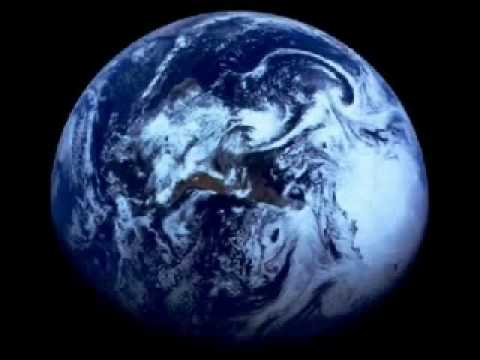

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("wupToqz1e2g")